# Introduction to Results Exploration and Plotting

Welcome! I am Mario Pascual Gonzalez, currently pursuing my studies in Bioinformatics at the University of Málaga. This Jupyter notebook is an integral part of my final project for the "Biomedical Imaging" course, focusing specifically on the exploration of results and the creation of plots for my research paper.

Here, you will find the code responsible for generating the insightful plots and visual representations that feature in my research paper. Each plot is crafted to effectively communicate the findings of our study, showcasing the algorithm's performance in segmenting stroke lesions. The notebook is structured to facilitate an understanding of how each plot correlates with the findings and conclusions drawn in the research.

Thank you for your interest in my work. I hope this notebook serves as a useful resource in understanding the intricacies of our data analysis and the visual storytelling aspect of our research in biomedical imaging.


In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

In [3]:
def overlay_mask_on_image2(image, mask, color=(255, 0, 0)):
    """
    Applies a colored mask over the original grayscale image to highlight the regions of interest.

    @:param mask: A binary mask where non-zero (typically 255) indicates the regions of interest.
    @:type: numpy.ndarray
    @:param color: A 3-tuple representing the BGR color (Blue, Green, Red) to overlay where the mask is
    active. Default is red.
    @:type: tuple

    @:return color_image (numpy.ndarray): The original image with the mask overlay in the specified color.
    """
    # Create a 3-channel version of the grayscale image
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Identify where the mask is active
    active_pixels = (mask == 255)

    # Apply color to the active mask regions in the image
    color_image[active_pixels] = color

    return color_image


def visualize2(image, mask, color=(255, 0, 0)):
    """
    Displays the original image, the mask, and the overlay of the mask on the original image side by side for
    comparison.

    @:param mask: A binary mask where non-zero (typically 255) indicates the regions of interest.
    @:type numpy.ndarray
    @:param color: A 3-tuple representing the BGR color (Blue, Green, Red) to overlay on the mask.
    @:type tuple
    Default is red.
    """
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    overlay = overlay_mask_on_image2(image, mask, color=color)
    plt.subplot(1, 3, 3)
    plt.imshow(overlay, cmap='gray')
    plt.title('Overlayed mask on image')
    plt.axis('off')

    plt.show()

In [4]:
path2 = "C://Users\mario\Python\Projects\MRIfuzzySegmentation\Sample data"
scan = nib.load(os.path.join(path2, "sub-r001s001_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz")).get_fdata()
mask = nib.load(os.path.join(path2, "sub-r001s001_ses-1_space-MNI152NLin2009aSym_label-L_desc-T1lesion_mask.nii.gz")).get_fdata()

## Explore cuantitative data

In [5]:
# First experiment data
path_exp1 = "C://Users\mario\Python\Projects\MRIfuzzySegmentation\OUTPUT_files\experiment1_data"
df_exp1 = pd.read_csv(os.path.join(path_exp1, "best_params_exp1.csv"))

pred_masks_exp1 = nib.load(os.path.join(path_exp1, "all_masks_exp1.nii.gz"))
pred_masks_exp1 = pred_masks_exp1.get_fdata().astype(np.uint8) 

# Second experiment data
path_exp2 = "C://Users\mario\Python\Projects\MRIfuzzySegmentation\OUTPUT_files\experiment2_data"
df_exp2 = pd.read_csv(os.path.join(path_exp2, "best_parameters.csv"))

pred_masks_exp2 = nib.load(os.path.join(path_exp2, "all_masks.nii.gz"))
pred_masks_exp2 = pred_masks_exp2.get_fdata().astype(np.uint8)

# Third experiment data
path_exp3 = "C://Users\mario\Python\Projects\MRIfuzzySegmentation\OUTPUT_files\experiment3_data"
df_exp3 = pd.read_csv(os.path.join(path_exp3, "best_parameters_dilat.csv"))

pred_masks_exp3 = nib.load(os.path.join(path_exp3, "all_masks.nii.gz"))
pred_masks_exp3 = pred_masks_exp3.get_fdata().astype(np.uint8)

In [6]:
df_exp1['slice'] = np.arange(50, 138)
df_exp2['slice'] = np.arange(50, 138)
df_exp3['slice'] = np.arange(50, 138)

In [7]:
def plt_slice_dice_fuzzy(df):
    # Separate the data into X (slices), Y (dice scores), and fuzzy values for coloring
    slices = list(df['slice'])
    dice_scores = list(df['dice_score'])
    fuzzy_values = list(df['fuzzy_val'])
    # Create scatter plot
    plt.figure(figsize=(15, 7))
    scatter = plt.scatter(slices, dice_scores, c=fuzzy_values, cmap='viridis')
    
    # Adding colorbar to represent the fuzzy values
    colorbar = plt.colorbar(scatter)
    colorbar.set_label('Fuzzy Value')
    
    # Adding titles and labels
    plt.title('Best Dice Coefficient per Slice with Corresponding Fuzzy Values')
    plt.xlabel('Slice Number')
    plt.ylabel('Dice Coefficient')
    print(f'Dice score mean: {np.mean(dice_scores)}')
    idx_highest = df['dice_score'].idxmax()
    print(f'Highest Dice Coefficient slice:')
    print(df.loc[df['dice_score'].idxmax(), 'slice'])
    print(df.iloc[idx_highest, :])
    # Displaying the plot
    plt.grid(True)
    plt.show()


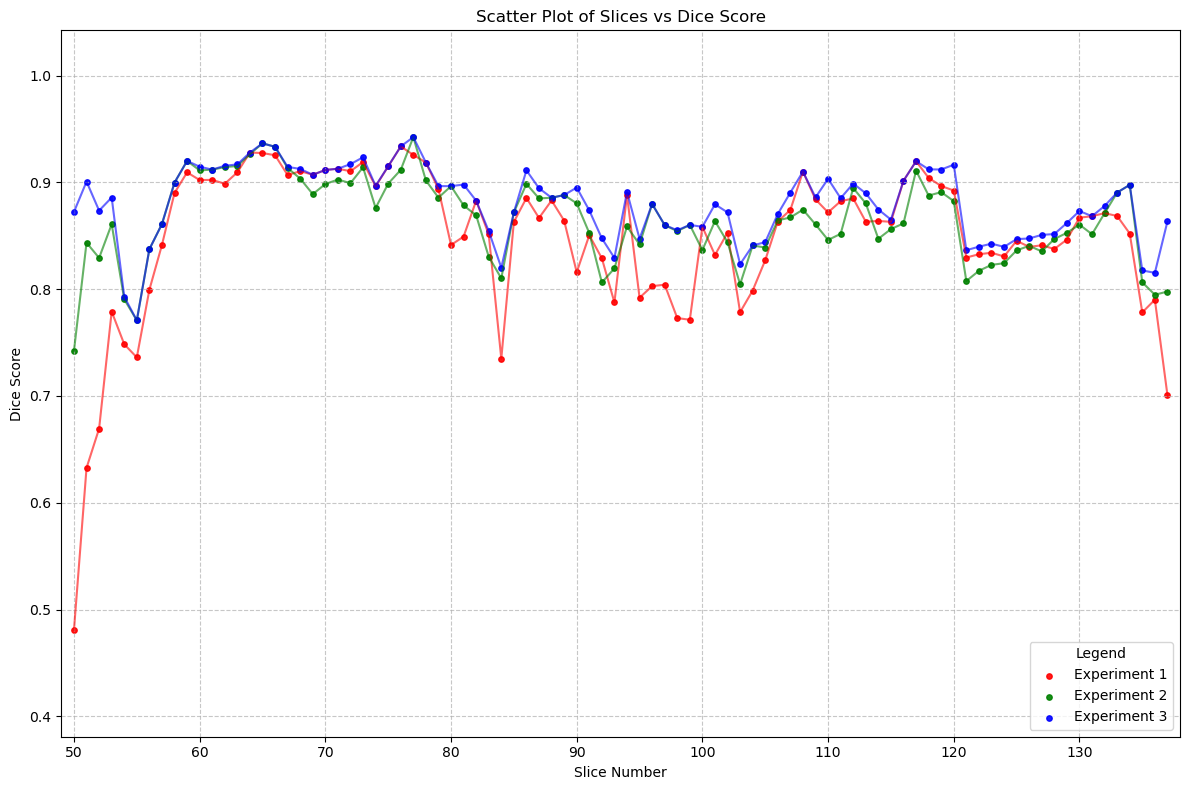

In [8]:
def combined_plot(df1, df2, df3):
    # Configuramos los colores para cada dataframe
    colors = ['red', 'green', 'blue']
    dataframes = [df1, df2, df3]
    labels = ['Experiment 1', 'Experiment 2', 'Experiment 3']

    # Crear el scatter plot
    plt.figure(figsize=(12, 8))  # Ajustar para un tamaño más grande

    for df, color, label in zip(dataframes, colors, labels):
        df_sorted = df.sort_values(by='slice')
        plt.scatter(df['slice'], df['dice_score'], color=color, s=15, alpha=0.9, marker='o', label=label)
        plt.plot(df_sorted['slice'], df_sorted['dice_score'], color=color, alpha=.6)
    # Añadir leyenda fuera del gráfico
    plt.legend(loc='lower right', title='Legend')

    # Añadir título y etiquetas a los ejes en inglés
    plt.title('Scatter Plot of Slices vs Dice Score')
    plt.xlabel('Slice Number')
    plt.ylabel('Dice Score')

    # Añadir cuadrícula para mejor lectura
    plt.grid(True, linestyle='--', alpha=0.7)

    # Ajustar los límites de los ejes si es necesario
    plt.xlim([min(dataframes, key=lambda df: df['slice'].min())['slice'].min() - 1,
              max(dataframes, key=lambda df: df['slice'].max())['slice'].max() + 1])
    plt.ylim([min(dataframes, key=lambda df: df['dice_score'].min())['dice_score'].min() - 0.1,
              max(dataframes, key=lambda df: df['dice_score'].max())['dice_score'].max() + 0.1])

    # Asegurar que el layout no corta la leyenda
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

combined_plot(df_exp1, df_exp2, df_exp3)

In [9]:
descriebe = df_exp3.describe().drop(["count", "25%", "50%", "75%"], axis=0).drop(["slice", "sigma", "dilation_kernel"], axis=1)
computational_time = pd.DataFrame(columns=["Experiment", "Computational Time"], data={"Experiment": [1, 2, 3], "Computational Time": ["73 min", "148 min", "503 min"]})
print(computational_time.to_latex(index=False,
                         float_format="{:.3f}".format,
                         ))

\begin{tabular}{rl}
\toprule
Experiment & Computational Time \\
\midrule
1 & 73 min \\
2 & 148 min \\
3 & 503 min \\
\bottomrule
\end{tabular}


#### Individual performance

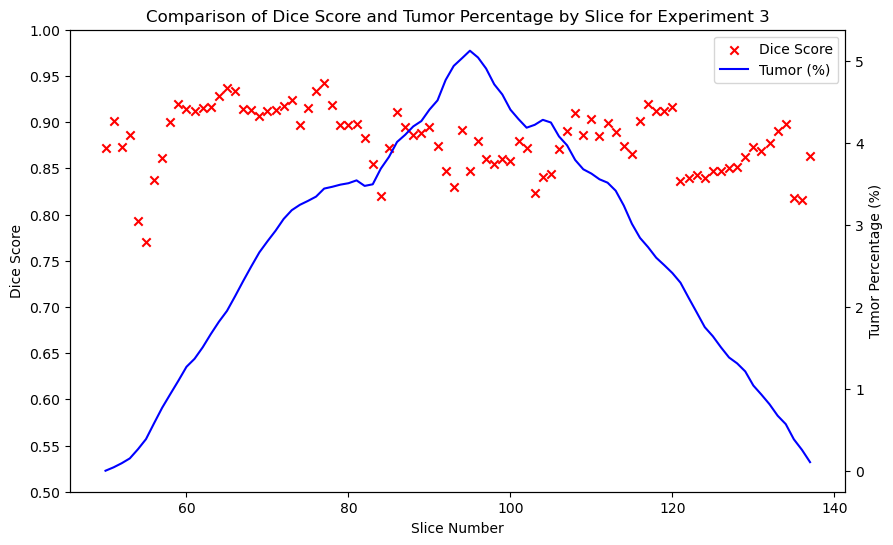

In [10]:
def calcular_porcentaje_tumor(slice_nifti, mascara_nifti):
    """
    Calcula el porcentaje de tumor en cada slice de una imagen NIFTI dada una máscara de tumor.

    Parameters:
    slice_nifti_path (str): Ruta al archivo NIFTI de las slices.
    mascara_nifti_path (str): Ruta al archivo NIFTI de la máscara del tumor.

    Returns:
    list: Lista de porcentajes de tumor en cada slice.
    """

    # Calcular el porcentaje de tumor en cada slice
    porcentajes = []
    for i in range(slice_nifti.shape[-1]):
        slice_actual = slice_nifti[..., i]
        mascara_actual = mascara_nifti[..., i]

        area_total = np.prod(slice_actual.shape)
        area_tumor = np.sum(mascara_actual > 0)

        porcentaje_tumor = (area_tumor / area_total) * 100
        porcentajes.append(porcentaje_tumor)

    return porcentajes

porc = calcular_porcentaje_tumor(scan, mask)
# Seleccionar el rango de slices de interés
rango_slices = range(50, 138)  # 138 porque el límite superior en range() es exclusivo
porcentajes_seleccionados = [porc[i] for i in rango_slices]
# Restar 0.096 a cada porcentaje en la lista
porcentajes_ajustados = [p - 0.096 for p in porcentajes_seleccionados]


def comparison(df, porcentajes_ajustados, i):
    # Create a new plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Scatter plot for 'dice_score'
    scatter = ax1.scatter(df['slice'], df['dice_score'], color='red', marker='x', label='Dice Score')
    ax1.set_xlabel('Slice Number')
    ax1.set_ylabel('Dice Score')
    ax1.tick_params(axis='y', labelcolor='black')  # Set tick colors to black
    ax1.set_yticks(np.arange(0.5, 1.05, 0.05))
    
    # Create a second Y-axis for the tumor percentage
    ax2 = ax1.twinx()
    line, = ax2.plot(rango_slices, porcentajes_ajustados, color='blue', label='Tumor Percentage')
    ax2.set_ylabel('Tumor Percentage (%)')
    ax2.tick_params(axis='y', labelcolor='black')  # Set tick colors to black
    
    # Title of the plot
    plt.title(f'Comparison of Dice Score and Tumor Percentage by Slice for Experiment {i}')
    
    # Collect the legends from both axes, but only for the elements we want in the legend
    lines_labels = [(scatter, 'Dice Score'), (line, 'Tumor (%)')]
    ax2.grid(False)  # Turn off the grid for ax2
    
    # Draw a single legend
    ax1.legend(*zip(*lines_labels), loc='upper right')
    
    # Show the plot
    plt.show()
    
comparison(df_exp3, porcentajes_ajustados, 3)

#### Overall performance combined

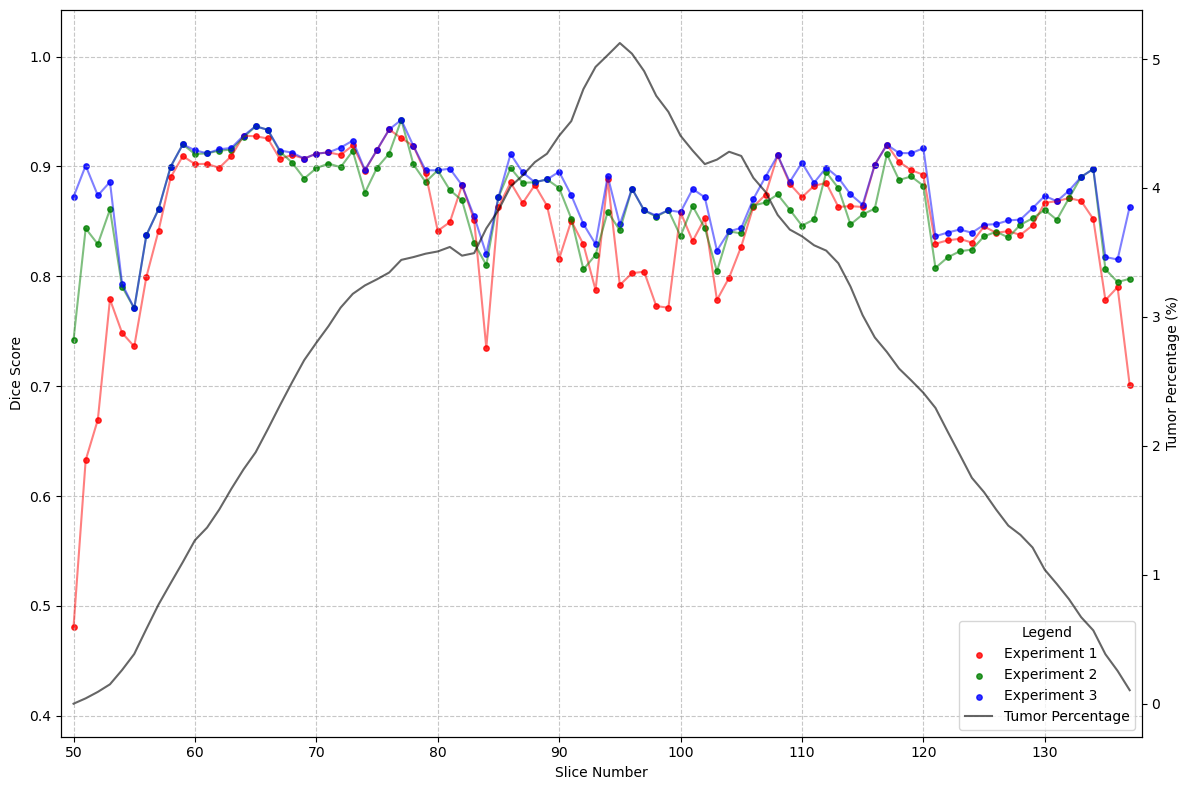

In [11]:
def combined_plot(df1, df2, df3, porcentajes_ajustados):
    # Configuramos los colores para cada dataframe
    colors = ['red', 'green', 'blue']
    dataframes = [df1, df2, df3]
    labels = ['Experiment 1', 'Experiment 2', 'Experiment 3']

    # Crear el scatter plot
    fig, ax1 = plt.subplots(figsize=(12, 8))  # Ajustar para un tamaño más grande

    # Añadir el segundo eje Y para porcentajes_ajustados
    ax2 = ax1.twinx()

    for df, color, label in zip(dataframes, colors, labels):
        # Asegúrate de que los datos están ordenados por 'slice' si es necesario
        df_sorted = df.sort_values(by='slice')
        ax1.scatter(df_sorted['slice'], df_sorted['dice_score'], color=color, s=15, alpha=0.8, marker='o', label=label)
        # Dibujar líneas transparentes entre los puntos
        ax1.plot(df_sorted['slice'], df_sorted['dice_score'], color=color, alpha=0.5)

    # Trazar porcentajes_ajustados en el segundo eje Y
    ax2.plot(df_sorted['slice'], porcentajes_ajustados, 'k-', label='Tumor Percentage', alpha=0.6)

    # Añadir leyenda
    # Recopilamos las leyendas de ambos ejes y las colocamos en una sola leyenda
    lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    ax1.legend(lines, labels, loc='lower right', title='Legend')

    # Añadir título y etiquetas a los ejes en inglés
    ax1.set_xlabel('Slice Number')
    ax1.set_ylabel('Dice Score')
    ax2.set_ylabel('Tumor Percentage (%)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')  # Set tick colors to black

    # Añadir cuadrícula para mejor lectura
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    """
    # Añadir lineas verticales en puntos de interés
    x1 = 82
    x2 = 108
    ax1.axvline(x=x1, color='orange', linestyle='--', linewidth=2, label='Line at x={}'.format(x1))
    ax1.axvline(x=x2, color='orange', linestyle='--', linewidth=2, label='Line at x={}'.format(x2)) 
    """
    
    # Ajustar los límites de los ejes si es necesario
    ax1.set_xlim([min(dataframes, key=lambda df: df['slice'].min())['slice'].min() - 1,
                  max(dataframes, key=lambda df: df['slice'].max())['slice'].max() + 1])
    ax1.set_ylim([min(dataframes, key=lambda df: df['dice_score'].min())['dice_score'].min() - 0.1,
                  max(dataframes, key=lambda df: df['dice_score'].max())['dice_score'].max() + 0.1])

    # Asegurar que el layout no corta la leyenda
    fig.tight_layout()

    # Mostrar el gráfico
    plt.show()
combined_plot(df_exp1, df_exp2, df_exp3, porcentajes_ajustados)

#### Masks

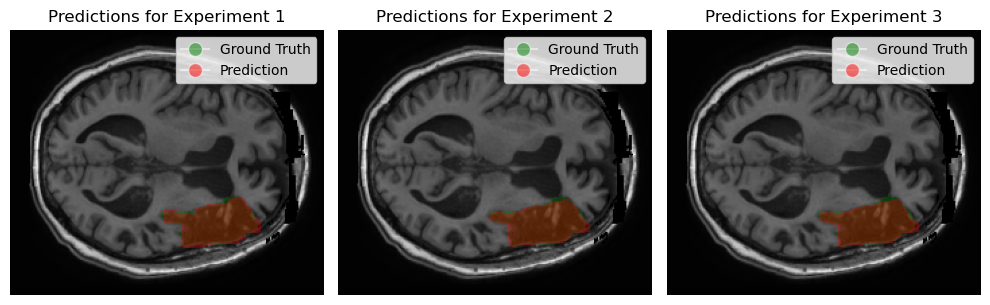

    fuzzy_val  num_seeds  sigma  dice_score  slice
70    0.18069         11    2.0    0.882434    120
    fuzzy_val  num_seeds  sigma  dice_score  slice
71   0.317241         11    4.0    0.807643    121


In [12]:
def transparent_overlaying(ax, ground_truth, pred_mask, mri_image, i):
    import matplotlib.colors as mcolors
    # Mostrar la imagen de MRI
    ax.imshow(mri_image, cmap='gray')

    # Definir un mapa de colores personalizado para la máscara de ground truth y predicción
    cmap_ground_truth = mcolors.ListedColormap(['none', 'green'])
    cmap_prediction = mcolors.ListedColormap(['none', 'red'])

    # Superponer la máscara real (ground truth) con verde y transparencia
    ax.imshow(ground_truth, cmap=cmap_ground_truth, alpha=0.3)

    # Superponer la máscara de predicción con rojo y transparencia
    ax.imshow(pred_mask, cmap=cmap_prediction, alpha=0.3)

    # Quitar los ejes si no son necesarios
    ax.axis('off')

    # Título y leyenda
    ax.set_title(f'Predictions for Experiment {i}')
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Ground Truth',
                                  markersize=10, markerfacecolor='green', alpha=0.5),
                       plt.Line2D([0], [0], marker='o', color='w', label='Prediction',
                                  markersize=10, markerfacecolor='red', alpha=0.5)]
    ax.legend(handles=legend_elements, loc='upper right')

# En 97 se ve cómo, debido a que las características del tumor, demasiado grande, se parecen a las características del líquido cefalorraquídeo, por lo que se confunde este tejido y la segmentación aumenta al zona del tumor a este

def plot_all_overlayed(slice_number):
    # Crear subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 9))

    # Diccionario para mapear índice a máscara de predicción
    pred_masks = {
        0: pred_masks_exp1[:, :, slice_number-50]/255,
        1: pred_masks_exp2[:, :, slice_number-50]/255,
        2: pred_masks_exp3[:, :, slice_number-50]/255
    }

    # Llamar a la función modificada para cada subplot, mostrando máscaras diferentes
    for i, ax in enumerate(axes):
        transparent_overlaying(ax,
                               ground_truth=mask[:, :, slice_number],
                               pred_mask=pred_masks[i],  # Usar máscara correspondiente al experimento
                               mri_image=scan[:, :, slice_number],
                               i=i+1  # Número del experimento
                               )

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
plot_all_overlayed(77)
print(df_exp2[df_exp3['slice']==120])
print(df_exp2[df_exp3['slice']==121])

#### Computational time

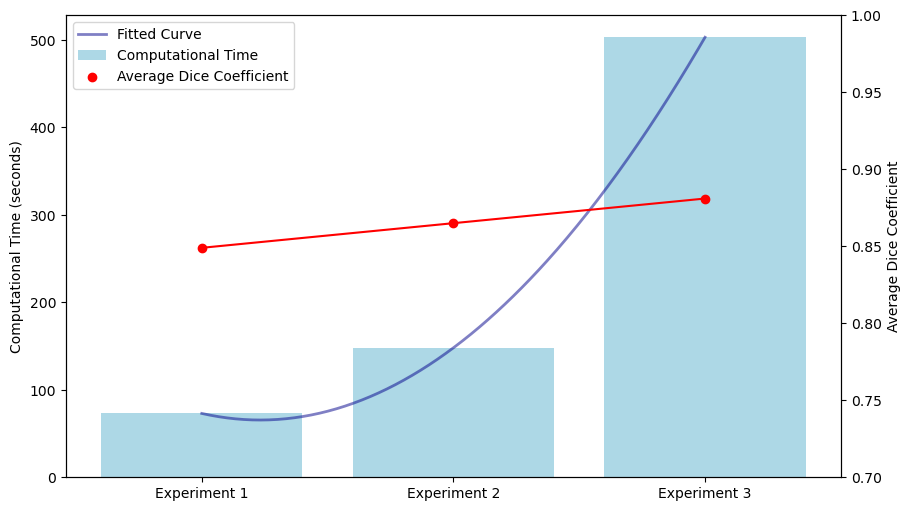

In [15]:
computational_times = [73, 148, 503]  # Tiempo computacional para cada experimento
average_dice_coefficients = [0.849, 0.865, 0.881]  # Coeficiente de Dice promedio para cada experimento
experiments = ['Experiment 1', 'Experiment 2', 'Experiment 3']  # Etiquetas de los experimentos
from scipy.interpolate import interp1d


# Crear figura y eje
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras para el tiempo computacional
bar_positions = np.arange(len(experiments))  # Posiciones de las barras
ax1.bar(bar_positions, computational_times, color='lightblue', label='Computational Time')

# Crear el gráfico de dispersión para el coeficiente de Dice promedio
ax2 = ax1.twinx()  # Crear un segundo eje Y
ax2.scatter(bar_positions, average_dice_coefficients, color='red', zorder=3, label='Average Dice Coefficient')
# Unir los puntos con una línea
ax2.plot(bar_positions, average_dice_coefficients, color='red', zorder=2)

# Interpolación spline para crear una curva redondeada
# Generamos puntos extra entre los bar_positions para la curva
x_new = np.linspace(bar_positions[0], bar_positions[-1], 300)
# Utilizamos un spline de orden 2 para un ajuste suave
spline = interp1d(bar_positions, computational_times, kind='quadratic')
y_spline = spline(x_new)

# Añadir la curva spline con un color azul similar al de las barras
ax1.plot(x_new, y_spline, color='darkblue', alpha=0.5, linewidth=2, label='Fitted Curve')

# Configurar los ticks y etiquetas del eje X
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(experiments)

# Configurar las etiquetas y leyendas
ax1.set_ylabel('Computational Time (seconds)')
ax2.set_ylabel('Average Dice Coefficient')

# Establecer los yticks de ax2 desde .7 hasta 1
ax2.set_yticks(np.arange(0.7, 1.01, 0.05))

# Mostrar las leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Mostrar el gráfico
plt.show()

# Frente de pareto


#### Combine performance and computational time...

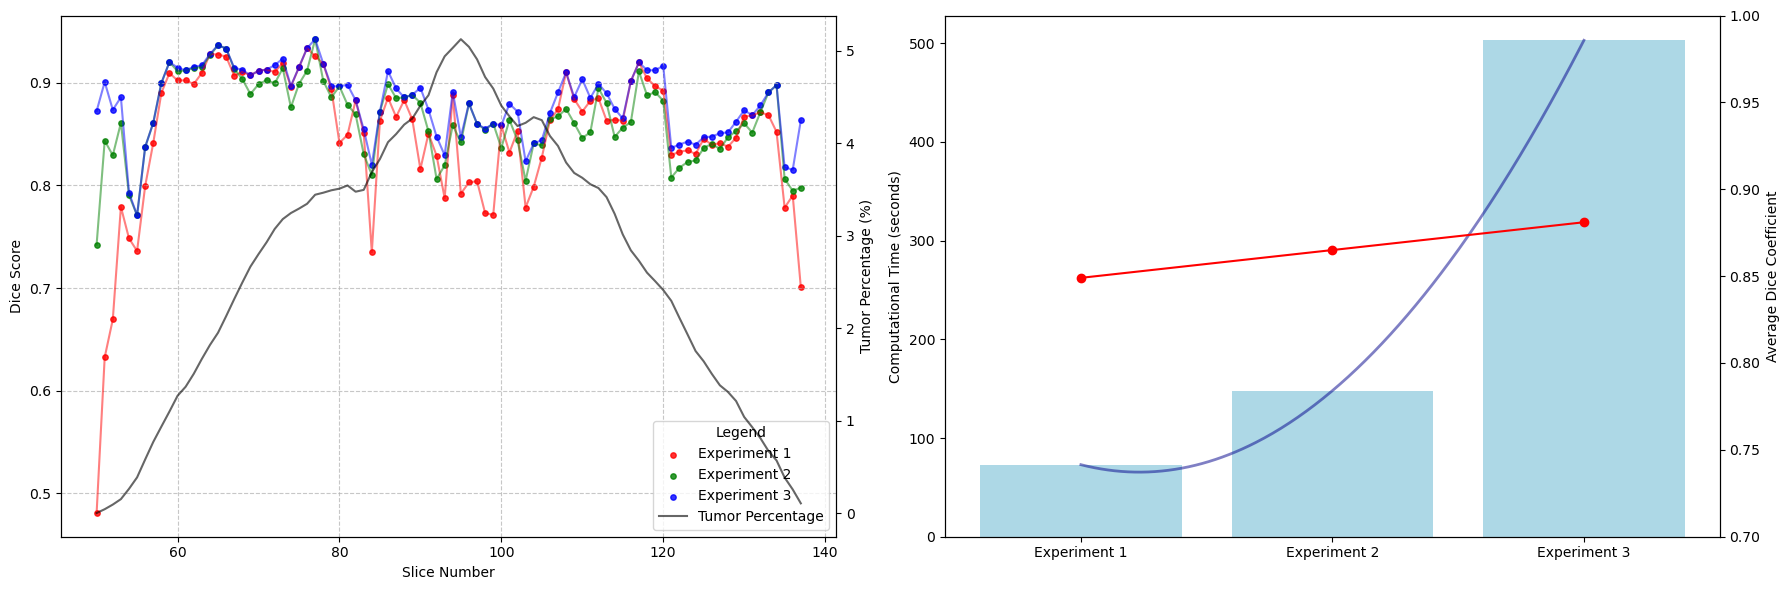

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d


def combined_plot(ax1, df1, df2, df3, porcentajes_ajustados):
    # Configuramos los colores para cada dataframe
    colors = ['red', 'green', 'blue']
    dataframes = [df1, df2, df3]
    labels = ['Experiment 1', 'Experiment 2', 'Experiment 3']

    # Añadir el segundo eje Y para porcentajes_ajustados
    ax2 = ax1.twinx()

    for df, color, label in zip(dataframes, colors, labels):
        # Asegúrate de que los datos están ordenados por 'slice' si es necesario
        df_sorted = df.sort_values(by='slice')
        ax1.scatter(df_sorted['slice'], df_sorted['dice_score'], color=color, s=15, alpha=0.8, marker='o', label=label)
        # Dibujar líneas transparentes entre los puntos
        ax1.plot(df_sorted['slice'], df_sorted['dice_score'], color=color, alpha=0.5)

    # Trazar porcentajes_ajustados en el segundo eje Y
    ax2.plot(df_sorted['slice'], porcentajes_ajustados, 'k-', label='Tumor Percentage', alpha=0.6)

    # Añadir leyenda
    # Recopilamos las leyendas de ambos ejes y las colocamos en una sola leyenda
    lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    ax1.legend(lines, labels, loc='lower right', title='Legend')

    # Añadir título y etiquetas a los ejes en inglés
    ax1.set_xlabel('Slice Number')
    ax1.set_ylabel('Dice Score')
    ax2.set_ylabel('Tumor Percentage (%)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')  # Set tick colors to black

    # Añadir cuadrícula para mejor lectura
    ax1.grid(True, linestyle='--', alpha=0.7)

def bar_and_spline_plot(ax1, computational_times, average_dice_coefficients, experiments):
    # Crear el gráfico de barras para el tiempo computacional
    bar_positions = np.arange(len(experiments))  # Posiciones de las barras
    ax1.bar(bar_positions, computational_times, color='lightblue', label='Computational Time')

    # Crear el gráfico de dispersión para el coeficiente de Dice promedio
    ax2 = ax1.twinx()  # Crear un segundo eje Y
    ax2.scatter(bar_positions, average_dice_coefficients, color='red', zorder=3, label='Average Dice Coefficient')
    # Unir los puntos con una línea
    ax2.plot(bar_positions, average_dice_coefficients, color='red', zorder=2)

    # Interpolación spline para crear una curva redondeada
    # Generamos puntos extra entre los bar_positions para la curva
    x_new = np.linspace(bar_positions[0], bar_positions[-1], 300)
    # Utilizamos un spline de orden 2 para un ajuste suave
    spline = interp1d(bar_positions, computational_times, kind='quadratic')
    y_spline = spline(x_new)

    # Añadir la curva spline con un color azul similar al de las barras
    ax1.plot(x_new, y_spline, color='darkblue', alpha=0.5, linewidth=2, label='Fitted Curve')

    # Configurar los ticks y etiquetas del eje X
    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels(experiments)

    # Configurar las etiquetas y leyendas
    ax1.set_ylabel('Computational Time (seconds)')
    ax2.set_ylabel('Average Dice Coefficient')
    ax2.set_yticks(np.arange(0.7, 1.01, 0.05))

# Crear subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Llamar a las funciones modificadas para cada subplot
combined_plot(ax1, df_exp1, df_exp2, df_exp3, porcentajes_ajustados)
bar_and_spline_plot(ax2, computational_times, average_dice_coefficients, experiments)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


## Animations

In [19]:
import plotly.graph_objs as go
import os

def make_animation(final_slices, path):
    """
    Create an animation of MRI slices with mask overlays and save it as an HTML file.

    Parameters:
    - final_slices (list): List of numpy.ndarray, each representing an MRI slice with mask overlays.
    - path (str): File path where the HTML file will be saved.
    """
    # Create a figure with layout options
    fig = go.Figure(
        layout=go.Layout(
            title="MRI Slices with Mask Overlay Animation",
            updatemenus=[{"type": "buttons",
                          "showactive": False,
                          "buttons": [{"label": "Play",
                                       "method": "animate",
                                       "args": [None, {"fromcurrent": True, "frame": {"duration": 500, "redraw": True}, "transition": {"duration": 300}}]}]
                          }]
        )
    )

    # Add initial data to the figure
    fig.add_trace(
        go.Image(z=final_slices[0])
    )

    # Create frames for each image in final_slices
    frames = [go.Frame(data=[go.Image(z=image)]) for image in final_slices]
    fig.frames = frames

    # Add a slider to control animation progress
    sliders = [{
        "currentvalue": {"prefix": "Slice: "},
        "transition": {"duration": 300},
        "pad": {"b": 10},
        "steps": [{"method": "animate",
                   "args": [[f.name], {"frame": {"duration": 500, "redraw": True},
                                       "mode": "immediate",
                                       "transition": {"duration": 300}}],
                   "label": str(i)} for i, f in enumerate(fig.frames)]
    }]

    # Set the layout for the slider
    fig.update_layout(sliders=sliders)

    # Save the animation as an HTML file
    if not os.path.exists(os.path.dirname(path)):
        os.makedirs(os.path.dirname(path))
    fig.write_html(path)

def overlay_maks(mri_images, pred_masks):
    final_slices = []

    for i, num in enumerate(np.arange(50, 136)):  # Adjust the range as per your requirement
        tmask = pred_masks[:, :, i].astype(np.uint8)
        v2mri_image = mri_images[:, :, num].astype(np.uint8)
        # Overlay the masks on the MRI image
        overlayed_image = overlay_mask_on_image2(image=v2mri_image, mask=tmask)
        final_slices.append(overlayed_image)

    return final_slices

exp1_fslices = overlay_maks(mri_images=scan, pred_masks=pred_masks_exp1)
exp2_fslices = overlay_maks(mri_images=scan, pred_masks=pred_masks_exp2)
exp3_fslices = overlay_maks(mri_images=scan, pred_masks=pred_masks_exp3)

# Example usage
anim_path = "C://Users\mario\Python\Projects\MRIfuzzySegmentation\OUTPUT_files\ImagesAnimationsForResearch\Animations"
make_animation(exp1_fslices, os.path.join(anim_path, "animationExperiment1.html"))
make_animation(exp2_fslices, os.path.join(anim_path, "animationExperiment2.html"))
make_animation(exp3_fslices, os.path.join(anim_path, "animationExperiment3.html"))


In [ ]:
def make_animationv2(final_slices, path):
    import plotly.graph_objs as go
    # Convertir cada imagen de 'final_slices' a una matriz de color 2D que Plotly puede utilizar
    volume_slices = [np.flipud(slice[:,:,0]) for slice in final_slices]  # Usando el canal rojo por ejemplo
    
    # Número de frames basado en la cantidad de slices
    nb_frames = 68
    
    # Obtener las dimensiones de un slice
    r, c = volume_slices[0].shape
    
    # Crear frames para la animación
    frames = [go.Frame(data=go.Surface(
        z=(6.7 - k * 0.1) * np.ones((r, c)),
        surfacecolor=volume_slices[k],
        cmin=0, cmax=255
    ), name=str(k)) for k in range(nb_frames)]
    
    # Añadir la superficie inicial antes de que comience la animación
    fig = go.Figure(data=go.Surface(
        z=6.7 * np.ones((r, c)),
        surfacecolor=volume_slices[0],
        colorscale='Gray',
        cmin=0, cmax=255
    ))
    
    # Función para los argumentos del frame
    def frame_args(duration):
        return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"}
        }
    
    # Configuración de los sliders
    sliders = [{
        "pad": {"b": 10, "t": 60},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": [{
            "args": [[f.name], frame_args(0)],
            "label": str(k),
            "method": "animate"
        } for k, f in enumerate(frames)]
    }]
    
    # Configuración del layout y adición de los frames al gráfico
    fig.update_layout(
        title='Slices in volumetric data',
        width=600,
        height=600,
        scene=dict(
            zaxis=dict(range=[-0.1, 6.8], autorange=False),
            aspectratio=dict(x=1, y=1, z=1)
        ),
        updatemenus=[{
            "buttons": [{
                "args": [None, frame_args(50)],
                "label": "&#9654;",  # play symbol
                "method": "animate"
            }, {
                "args": [[None], frame_args(0)],
                "label": "&#9724;",  # pause symbol
                "method": "animate"
            }],
            "direction": "left",
            "pad": {"r": 10, "t": 70},
            "type": "buttons",
            "x": 0.1,
            "y": 0
        }],
        sliders=sliders
    )
    
    fig.frames = frames
    
    # Mostrar la figura con la animación
    fig.show()
    fig.write_html(path)


anim_path = "C://Users\mario\Python\Projects\MRIfuzzySegmentation\OUTPUT_files\ImagesAnimationsForResearch\Animations"
make_animationv2(exp1_fslices, os.path.join(anim_path, "animationExperiment1_v2.html"))
make_animationv2(exp2_fslices, os.path.join(anim_path, "animationExperiment2_v2.html"))
make_animationv2(exp3_fslices, os.path.join(anim_path, "animationExperiment3_v2.html"))


In [22]:
import imageio

def make_animation_gif(final_slices, gif_path):
    """
    Create a GIF animation of MRI slices with mask overlays and save it to a file.

    Parameters:
    - final_slices (list): List of numpy.ndarray, each representing an MRI slice with mask overlays.
    - gif_path (str): File path where the GIF file will be saved.
    """
    # Create the output directory if it doesn't exist
    os.makedirs(os.path.dirname(gif_path), exist_ok=True)

    # Assuming 'final_slices' is a list of numpy arrays representing the images.
    # Convert each image slice to the right color format if needed.
    # If they are already in the correct format, you can skip this step.
    volume_slices = [np.flipud(slice) for slice in final_slices]  # This assumes your slices are already in the correct color format

    # Write the frames to a gif file
    with imageio.get_writer(gif_path, mode='I', duration=0.1) as writer:
        for slice in volume_slices:
            # Ensure the slice is in uint8
            if slice.dtype != np.uint8:
                slice = (255 * (slice / np.max(slice))).astype(np.uint8)
            writer.append_data(slice)

# Example usage
make_animation_gif(exp1_fslices, os.path.join(anim_path, "exp1.gif"))
make_animation_gif(exp2_fslices, os.path.join(anim_path, "exp2.gif"))
make_animation_gif(exp3_fslices, os.path.join(anim_path, "exp3.gif"))
